In [1]:
%pylab
import powerlaw
import pickle
def load_dict(name):
        with open('dict-' + name + '.pkl', 'rb') as f:
                return pickle.load(f)
fire=load_dict("fire")

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


Here we apply the statistical machinery to investigate the properites of the total area burnt on Portugal. I use the module "powerlaw" that is consistent with the article " Power law in empirical data". See "powerlaw: a Python package for analysis of heavy-tailed distributions" as a reference.

In [2]:
%matplotlib 

figure(figsize=(4,3))
fire=load_dict("fire")
a=fire["tot_burnt"]
ax=gca()
ign=fire["ignition_date"]
date=[datetime.date(1900, 1, 1) + datetime.timedelta(int(i)) for i in ign]
plot_date(date,a,xdate=True,fmt="r.",ms=7,mew=0.7,ls="-",mec="k",mfc="y") 
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.e'))
xlabel("Year",fontsize=12.5)
ylabel("Total area burnt $A_F$ (ha)",fontsize=12.5)
#ax.xaxis.set_major_formatter(matplotlib.ticker.MaxNLocator(nbins=4))
tight_layout()
savefig("series.pdf")

Using matplotlib backend: Qt5Agg


In [25]:
plot?

In [3]:
fit.supported_distributions

{'exponential': powerlaw.Exponential,
 'lognormal': powerlaw.Lognormal,
 'lognormal_positive': powerlaw.Lognormal_Positive,
 'power_law': powerlaw.Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law}

In [1]:
%matplotlib
a=fire["tot_burnt"]
a=a[a>1]

fit=powerlaw.Fit(a)
R, p = fit.distribution_compare('stretched_exponential','power_law',  normalized_ratio=True)
fig = fit.plot_ccdf(linewidth=3)
fit.power_law.plot_ccdf(ax=fig,ls="--",label="powerlaw")
fit.stretched_exponential.plot_ccdf(ax=fig,ls="-.",label="stretched")
fit.lognormal.plot_ccdf(ax=fig,ls="-.",label="lognorm")
#plot(sort(a),1-arange(0,len(a))/len(a),"r") 
R,p
legend()

Using matplotlib backend: Qt5Agg


NameError: name 'fire' is not defined

In [ ]:
%matplotlib
a=fire["tot_burnt"]
a=a[a>1]
fit=powerlaw.Fit(a,xmin_distance="Asquare")
#plot(x,y,".")
plot(sort(a),len(a)-arange(0,len(a))) 
loglog()
fit.Asquare
print("Anderson-Darling distance"+str(fit.xmin))
axvline(fit.xmin,label="Anderson-Darling")
fit=powerlaw.Fit(a,xmin_distance="D")
axvline(fit.xmin,ls="--",c="r",label="KS")
legend()
plot()
fit.alpha

Using matplotlib backend: Qt5Agg


Calculating best minimal value for power law fit
/home/k1762355/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Anderson-Darling distance1170.0


In [79]:
%matplotlib
figure(figsize=(4,3))
KS=[]
alpha=[]
sigma=[]
lenght=[]
for i in arange(min(a), 10000):
    fit=powerlaw.Fit(a,xmin=i,discrete=False)
    KS+=[fit.D]
    alpha+=[fit.alpha]
    sigma+=[fit.sigma]
    lenght+=[count_nonzero(a>i)]
alpha=array(alpha)
sigma=array(sigma)
lenght=array(lenght)

numpy.save("alpha.npy",[alpha,sigma,KS,lenght])

Using matplotlib backend: Qt5Agg


/home/k1762355/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


This cell  makes the plots of KS divergence and alpha vs xmin

In [108]:
close("all")
figure(figsize=(4,3))
alpha,sigma,KS,lenght=numpy.load("alpha.npy")
plot(arange(min(a),10000),KS,"-")
xlabel("lower bound, $a$ (ha) ",fontsize=12.5)
ylabel("KS divergence, $D$",fontsize=12.5)
fit=powerlaw.Fit(a,xmin_distance="D")
axvline(fit.xmin,ls="--",c="r",label="D minimum")
axvline(39,ls="-.",c="g",label="D minimum below 100 ha",zorder=0)
tight_layout()
#legend(loc=(.15,.7),fontsize=12.5,frameon=False,numpoints=1)
text(980,0.21,"$a_{opt}=$880 ha",color="red")
text(50,0.21,"$\\hat{a}=$39 ha",color="g")
xlim(1,25000)
figure(figsize=(4,3))
plot(arange(min(a),10000),alpha,"r-")
fill_between(arange(min(a),10000),alpha+sigma,alpha-sigma,alpha=0.5)
xlabel("lower bound, $a$ (ha)",fontsize=12.5)
ylabel(" Scaling parameter, $\\alpha$",fontsize=12.5)
fit=powerlaw.Fit(a,xmin_distance="D")
axvline(fit.xmin,ls="--",c="r",label="D minimum")
axvline(39,ls="-.",c="g",label="D minimum below 100 ha",zorder=0)
tight_layout()
#legend(fontsize=12.5,frameon="False")
text(980,1.6,"$a_{opt}=$880 ha",color="red")
text(50,1.6,"$\\hat{a}=$39 ha",color="g")
xlim(1,27000)

Calculating best minimal value for power law fit
/home/k1762355/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit


(1, 27000)

In [72]:
fit.xmin

880.0

In [3]:
def area_over_time():
    figure(figsize=(4,3))
    area=fire["tot_burnt"]
    ign=fire["ignition_date"]
    cond=(area>1)&(ign>0)
    area=area[cond]
    ign=ign[cond]
    y=from_days_to_date(ign,"month")
    h,b=histogram(y,bins=arange(1,14),weights=area, density=False)
    plot(b[:-1],h,"-o",ms=7,mec="k",mew=3,mfc="w")
    tight_layout()
    ylabel("Total area burnt per month \n (ha$^2$/month)",fontsize=12.5)
    xlabel("Month",fontsize=12.5)
    gca().yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%1.1e'))
    tight_layout()
    print("sum(h)"+str(sum(h)))
    gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    figure()
    '''title("area")
    hist(y,bins=arange(1,14),weights=area)'''
    y=from_days_to_date(ign,"year")
    h,b=histogram(y,bins=arange(min(y),max(y)+2,1))
    plot(b[:-3],h[:-2],"-o",ms=7,mec="k",mew=3)
    ylabel("Probability density of fires",fontsize=12.5)
    xlabel("Year",fontsize=12.5)
def from_days_to_date(b,feature="month"):
    if feature=="day":
        return [(datetime.date(1900, 1, 1) + datetime.timedelta(int(i))).day for i in b] # this convert the number of days from 1st Jan 1900 to standard date, from which I can extract the feature
    elif feature=="month":
        return [(datetime.date(1900, 1, 1) + datetime.timedelta(int(i))).month for i in b] # this convert the number of days from 1st Jan 1900 to standard date, from which I can extract the feature
    elif feature=="year":
        return [(datetime.date(1900, 1, 1) + datetime.timedelta(int(i))).year for i in b] # this convert the number of days from 1st Jan 1900 to standard date, from which I can extract the feature
    else:
        raise NameError("accepted features are: days, month or year")
%matplotlib
area_over_time()

Using matplotlib backend: Qt5Agg
sum(h)2958922.6743


In [23]:
%matplotlib
figure(figsize=(4,3))
area=fire["tot_burnt"]
cond=area>1
area=area[cond]
c=fire["cause"]
c=c[cond]
ign=fire["ignition_date"]
ign=ign[cond]
year=array(from_days_to_date(ign,"year"))
unknown=[]
negligence=[]
intentional=[]
reignition=[]
lightning=[]
for y in arange(min(year),max(year)+1):
    cond2=((c==0)|(c==12))&(year==y)
    unknown+=[count_nonzero(c[cond2])/float(count_nonzero(c[year==y]))]#compute the fraction of unknown causes per year
    negligence+=[count_nonzero(c[(c==1)&(year==y)])/float(count_nonzero(c[year==y]))]
    intentional+=[count_nonzero(c[((c==10)|(c==22))&(year==y)])/float(count_nonzero(c[year==y]))]
    reignition+=[count_nonzero(c[(c==19)&(year==y)])/float(count_nonzero(c[year==y]))]
    lightning+=[count_nonzero(c[(c==11)&(year==y)])/float(count_nonzero(c[year==y]))]
#f, axarr = plt.subplots(1, 2, sharex='col',sharey="row")
plot(arange(min(year),max(year)+1),unknown,"ms",label="Unknown",ms=6,mew=2,ls="-",mfc="w")

#tight_layout()
plot(arange(min(year),max(year)+1),array(negligence),"bo",label="Negligence",ms=6,mew=2,ls="-",mfc="w")
ylabel("$(N_{FY}$ by a given cause$)/(N_{FY})$ ",fontsize=12.5)
plot(arange(min(year),max(year)+1),intentional,"gx",label="Intentional",ms=6,mew=2,ls="-",mfc="w")
xlabel("Year",fontsize=12.5)
legend(frameon=True,numpoints=1)
tight_layout()

figure(figsize=(4,3))
plot(arange(min(year),max(year)+1),reignition,"ro",label="Reignition",ms=6,mew=2,ls="-",mfc="w")
xlabel("Year",fontsize=12.5)
ylabel("$(N_{FY}$ by reignition$)/(N_{FY})$ ",fontsize=12.5)
tight_layout()

figure(figsize=(4,3))
plot(arange(min(year),max(year)+1),lightning,"ro",label="lightning",ms=6,mew=2,ls="-",mfc="w")
xlabel("Year",fontsize=12.5)
ylabel("$(N_{FY}$ by lightigh$)/(N_{FY})$ ",fontsize=12.5)
tight_layout()


Using matplotlib backend: Qt5Agg


In [117]:
axarr

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc713f4208>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fdc713a0080>], dtype=object)

Let's analyse the causes

/home/k1762355/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/k1762355/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


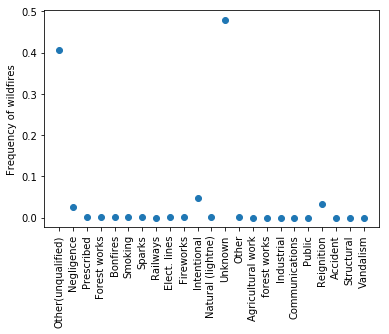

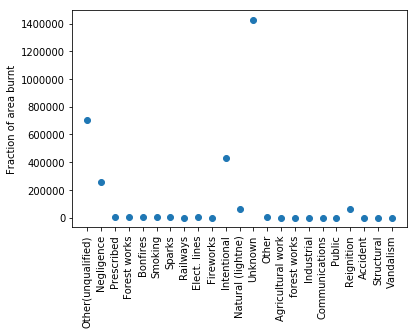

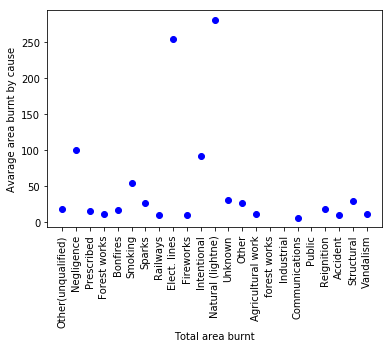

In [29]:
%matplotlib inline
a=fire["tot_burnt"]
cond=[a>1]
a=a[cond]
c=fire["cause"]
c=c[cond]
my_xticks = ["Other(unqualified)",'Negligence','Prescribed','Forest works','Bonfires',"Smoking","Sparks","Railways","Elect. lines","Fireworks","Intentional","Natural (lightne)","Unknown","Other","Agricultural work","forest works","Industrial","Communications","Public","Reignition","Accident","Structural","Vandalism"]
h,b=histogram(c,bins=arange(0,24),density=True)
plt.xticks(b[:-1], my_xticks,rotation=90)
ylabel("Frequency of wildfires")
plot(b[:-1],h,"o")
figure()
h,b=histogram(c,weights=a,bins=arange(0,24),density=False)
ylabel("Fraction of area burnt")
plt.xticks(b[:-1], my_xticks,rotation=90)
plot(b[:-1],h,"o")
figure()

for caus in arange(0,23):
    plot(caus,mean(a[c==caus]),"bo")
plt.xticks(b[:-1], my_xticks,rotation=90)
ylabel("Avarage area burnt by cause")
xlabel("Total area burnt")

In [9]:
sum(h)

0.99999999999999989

We have observed that natural fires are  

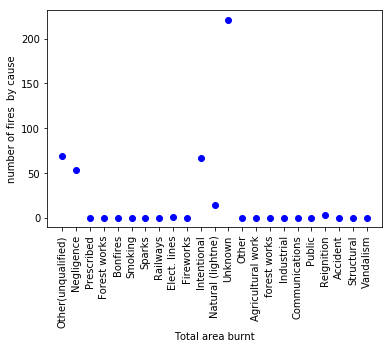

In [19]:
%matplotlib inline
a=fire["tot_burnt"]
cond=[a>1]
a=a[cond]
c=fire["cause"]
c=c[cond]
for caus in arange(0,23):
    cond2=(c==caus)&(a>1000)
    plot(caus,len(a[cond2]),"bo")
plt.xticks(b[:-1], my_xticks,rotation=90)
ylabel("number of fires  by cause")
xlabel("Total area burnt")

Make the cumulative respect to different causes

Using matplotlib backend: Qt5Agg
alpha due to natural causes is2.17639389784


Calculating best minimal value for power law fit
/home/k1762355/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


[]

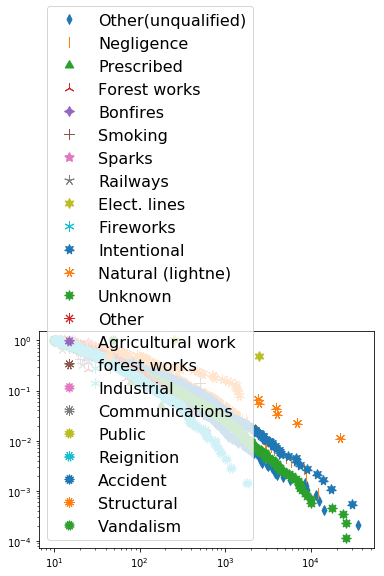

In [20]:
%matplotlib 
figure()
markers = [(int(2+i/2), int(1+i%2), 0) for i in arange(23)]
a=fire["tot_burnt"]
cond=[a>10]
a=a[cond]
c=fire["cause"]
c=c[cond]
#plot(sort(a),1-arange(0,len(a))/len(a),"--")
for caus in arange(0,23):
    plot(sort(a[c==caus]),1-arange(0,len(a[c==caus]))/len(a[c==caus]),marker=markers[caus],ms=10,ls='')
fit=powerlaw.Fit(a[c==11],xmin_distance="Asquare")
print("alpha due to natural causes is"+str(fit.alpha))
legend(my_xticks,loc="lower left",fontsize=16)
loglog()

Let's consider  only the causes of wilfire that has an effect on tails.
From the result of below we observe that "Other(unqualified),NEgligence, Intentional, Natural,Unknown,Other,Reignition

In [30]:
%matplotlib
figure()
markers = [(int(2+i/2), int(1+i%2), 0) for i in arange(23)]
a=fire["tot_burnt"]
cond=[a>100]
a=a[cond]
c=fire["cause"]
b=hist(c[cond],bins=arange(0,24))
title("Histogram of the causes for high burned area (a>100)")
h=b[0]
bins=b[1][:-1]
xticks(bins, my_xticks,rotation=90)
bins=bins[h>10]
print(str(bins)+"are the causes that we look at")

#to make the cumulative density by cause on what is left
'''for caus in bins:
    plot(sort(a[c==caus]),1-arange(0,len(a[c==caus]))/len(a[c==caus]),marker=markers[caus],ls='--',label=my_xticks[caus])
legend()'''

Using matplotlib backend: Qt5Agg
[ 0  1 10 11 12 13 19]are the causes that we look at


"for caus in bins:\n    plot(sort(a[c==caus]),1-arange(0,len(a[c==caus]))/len(a[c==caus]),marker=markers[caus],ls='--',label=my_xticks[caus])\nlegend()"

[]

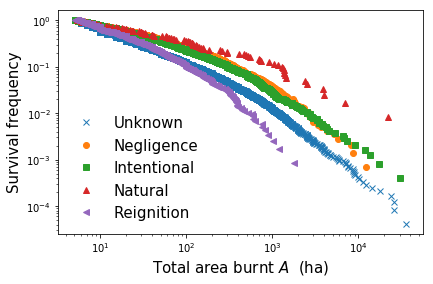

In [23]:
#figure(figsize=(4,3))
a=fire["tot_burnt"]
c=fire["cause"]
cond=[a>5]
a=a[cond]
c=c[cond]
unknown=(c==0)| (c==12)
plot(sort(a[unknown]),1-arange(0,len(a[unknown]))/len(a[unknown]),"x",label="Unknown")
plot(sort(a[c==1]),1-arange(0,len(a[c==1]))/len(a[c==1]),"o",label="Negligence")
plot(sort(a[c==10]),1-arange(0,len(a[c==10]))/len(a[c==10]),"s",label="Intentional")
plot(sort(a[c==11]),1-arange(0,len(a[c==11]))/len(a[c==11]),"^",label="Natural")
plot(sort(a[c==19]),1-arange(0,len(a[c==19]))/len(a[c==19]),"<",label="Reignition")
legend(fontsize=15,frameon=False)
xlabel("Total area burnt $A$  (ha)",fontsize=15)
ylabel("Survival frequency",fontsize=15)
tight_layout()
loglog()

In [ ]:
b=a[c==caus]
len(b[b>100])/len(b) #survival function

In [ ]:
#fig4 = fit.plot_ccdf(linewidth=3)
fig4=gca()
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--')
fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--')

In [26]:
a=fire["tot_burnt"]
c=fire["cause"]
(len(a[c==0])+len(a[c==12]))/len(a)

0.9235278684765762

In [20]:
d=fire["ignition_date"]
a=fire["tot_burnt"]
d[a>39]
from_days_to_date([min(d)])

[2]